
Первые строки датасетща:
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1 

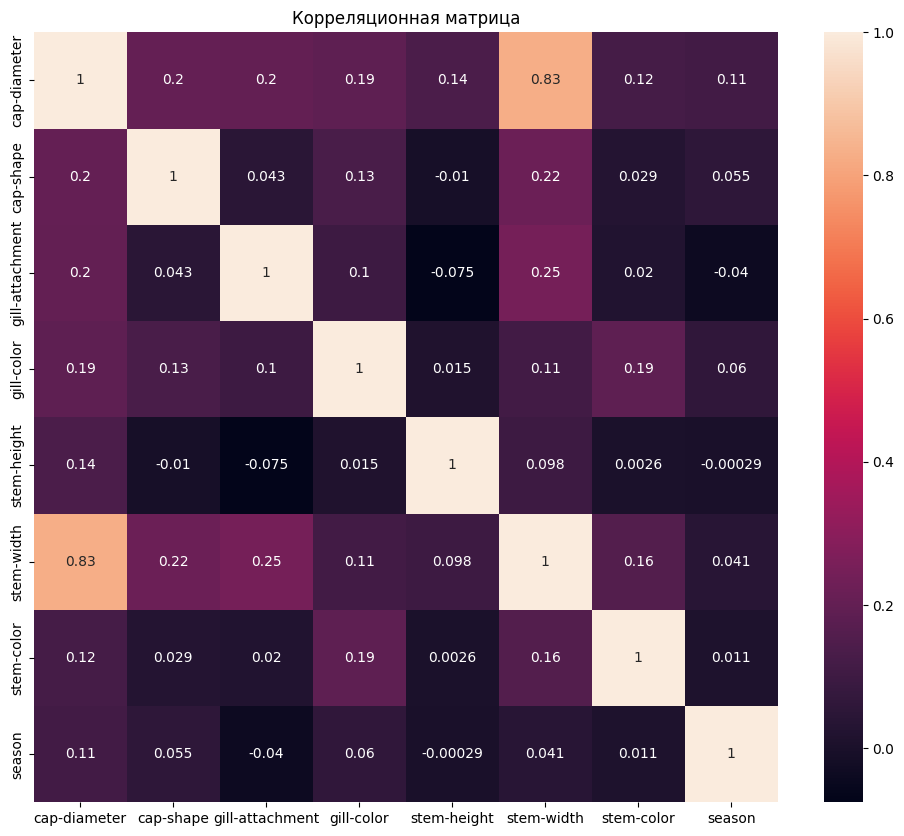



Модель: Random Forest
Accuracy: 0.9907
Precision: 0.9913
Recall: 0.9916
F1 Score: 0.9915


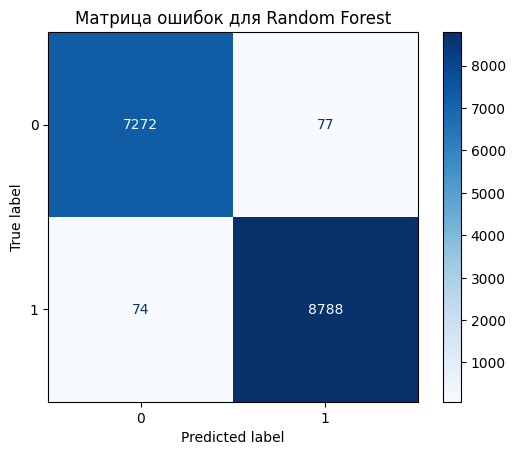



Модель: Logistic Regression
Accuracy: 0.6349
Precision: 0.6504
Recall: 0.7181
F1 Score: 0.6826


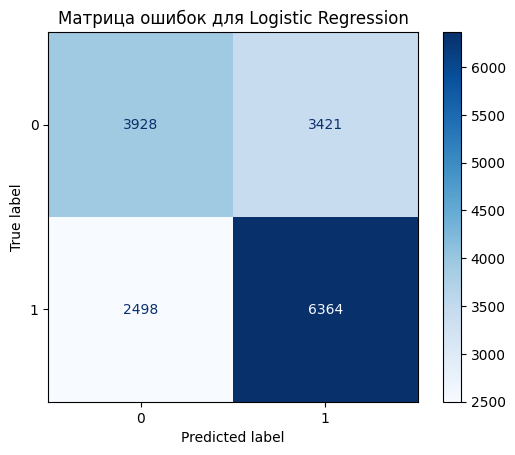


Значимости признаков для модели Random Forest:
stem-width: 0.2239
gill-attachment: 0.1421
stem-color: 0.1284
cap-diameter: 0.1266
gill-color: 0.1255
stem-height: 0.1235
cap-shape: 0.0919
season: 0.0380

Сравнение моделей по метрикам:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.990685   0.991314  0.991650  0.991482
Logistic Regression  0.634878   0.650383  0.718122  0.682576


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, 
                             classification_report, confusion_matrix, ConfusionMatrixDisplay)

# Загрузка данных
data = pd.read_csv('data/mushroom_cleaned.csv')

# Предварительный анализ данных
print("\nПервые строки датасетща:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())
print("\nРаспределение классов:")
print(data['class'].value_counts())

# Проверка на пропуски
if data.isnull().sum().sum() > 0:
    print("\nДанные содержат пропуски. Количество пропусков по столбцам:")
    print(data.isnull().sum())
else:
    print("\nПропусков в данных нет.")

# Кодирование категориальных признаков
encoded_data = pd.get_dummies(data, drop_first=True)
print("\nРазмер данных после кодирования:", encoded_data.shape)


# Разделение на признаки и целевую переменную
X = encoded_data.drop('class', axis=1)
y = encoded_data['class']  # 1 - съедобные, 0 - несъедобные

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Корреляционная матрица
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица')
plt.show()

# Инициализация моделей
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Обучение и оценка моделей
results = {}
for name, model in models.items():
    print(f"\n\nМодель: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Матрица ошибок для {name}')
    plt.show()

# Оценка важности признаков для случайного леса
rf_model = models['Random Forest']
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("\nЗначимости признаков для модели Random Forest:")
for idx in sorted_indices[:10]:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

# Сравнение моделей
results_df = pd.DataFrame(results).T
print("\nСравнение моделей по метрикам:")
print(results_df.sort_values(by='F1 Score', ascending=False))
